In [4]:
import os
path = "C:/pytest/data/"
os.chdir(path)

In [5]:
import pandas as pd
import numpy as np

In [6]:
import rhinoMorph
rn = rhinoMorph.startRhino()

filepath:  C:\Anaconda3\lib\site-packages
classpath:  C:\Anaconda3\lib\site-packages\rhinoMorph/lib/rhino.jar
JVM is already started~
RHINO started!


In [11]:
def read_data(filename, encoding = 'cp949'):
    with open(filename, 'r', encoding = encoding) as f:
        data = [line.split('\t') for line in f.read().splitlines()]
    return data
def write_data(data, filename, encoding = 'cp949'):
    with open(filename, 'w', encoding = encoding) as f:
        f.write(data)

In [15]:
data = read_data('data.txt')
print(type(data), len(data), data[:20], sep = '\n')

<class 'list'>
6322
[['저희 안경원 코드 번호 확인이 가능할까요?', '매장코드'], ['저희 안경원 코드를 잊어버렸습니다', '매장코드'], ['안경원 코드번호 확인이 어렵습니다 어떻게 해야하나요?', '매장코드'], ['매장 코드번호 확인이 어렵습니다 어떻게 해야하나요?', '매장코드'], ['안경원 코드번호 확인하는 방법이 있을까요?', '매장코드'], ['안경원 코드번호 조회부탁드립니다', '매장코드'], ['저희 안경원 코드 확인부탁드려요', '매장코드'], ['안경원 코드 번호를 잊어버렸어요 확인부탁드려요', '매장코드'], ['안경원 코드 번호 확인을 어디에서 확인 할 수 있나요?', '매장코드'], ['저희 안경원 코드 어떻게 확인 할 수 있나요?', '매장코드'], ['저희 매장 코드 번호 확인하고싶어요', '매장코드'], ['매장 코드 번호 어디에서 볼 수 있나요?', '매장코드'], ['매장 코드 번호 확인하고싶어요 어디에서 볼 수 있나요?', '매장코드'], ['매장 코드 번호 조회는 어디에서 할 수 있나요?', '매장코드'], ['매장 코드 번호 어떻게 알 수 있나요?', '매장코드'], ['매장 번호 확인하고싶어요 어디에서 볼 수 있나요?', '매장코드'], ['코드번호 까먹었습니다', '매장코드'], ['코드번호 잊어버렸습니다', '매장코드'], ['코드번호 잊어버렸을땐 어떻게 해야하죠?', '매장코드'], ['매장 코드 번호 잊어버렸습니다 어떻게 확인하죠?', '매장코드']]


In [19]:
# morphed_data = ""
# for data_each in data:
#     morphed_data_each = rhinoMorph.onlyMorph_list(rn, data_each[0], pos = ['NNG','NNP','NP','VV','VA','VX','XR','IC','MM','MAG'])
#     joined_data_each = ' '.join(morphed_data_each)
#     if joined_data_each:
#         morphed_data += joined_data_each + '\t' + data_each[1] + '\n'

In [20]:
# write_data(morphed_data, 'chat_morphed.txt', encoding = 'cp949')

In [23]:
data = read_data('chat_morphed.txt')
print(type(data), len(data), len(data[0]), data[0], sep='\n')

<class 'list'>
6322
2
['저희 안경원 코드 번호 확인 가능', '매장코드']


In [24]:
from sklearn.model_selection import train_test_split

In [25]:
text = [line[0] for line in data]
label = [line[1] for line in data]

In [26]:
train_X, test_X, train_y, test_y = train_test_split(text, label, stratify= label)

In [27]:
print(len(train_X), len(test_X))

4741 1581


### 데이터 분리 확인
+ Counter 클래스를 이용해 train과 Test 데이터의 비율을 확인

In [28]:
from collections import Counter
train_y_freq = Counter(train_y)
print(train_y_freq)

test_y_freq = Counter(test_y)
print(test_y_freq)

Counter({'반품문의': 1422, '교환문의': 989, '배송문의': 705, '담당자문의': 517, '샘플문의': 460, '매장코드': 234, '배송비': 192, '청구금액': 107, '제품가격': 75, '제품불일치': 40})
Counter({'반품문의': 474, '교환문의': 330, '배송문의': 236, '담당자문의': 172, '샘플문의': 153, '매장코드': 78, '배송비': 64, '청구금액': 36, '제품가격': 25, '제품불일치': 13})


In [31]:
text_len = [len(line.split(' ')) for line in train_X]
print('최소길이 : {}\n최대 길이 : {}\n평균 길이 : {}\n중위수 길이 : {}\n구간별 최대 길이 : {}'.format(np.min(text_len), np.max(text_len), np.round(np.mean(text_len), 1), np.median(text_len), np.percentile(text_len, [0,25,50,75,99,100])))

최소길이 : 2
최대 길이 : 18
평균 길이 : 6.4
중위수 길이 : 6.0
구간별 최대 길이 : [ 2.  5.  6.  7. 10. 18.]


In [33]:
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import math
max_words = 1000
maxlen = 20

In [34]:
# 객체 생성
tokenizer = Tokenizer(num_words= max_words)
# fit함수를 이용하여 인덱스 구축(header 생성)
tokenizer.fit_on_texts(train_X)
word_index = tokenizer.word_index

In [36]:
print(len(word_index))

198


In [46]:
train_X

['교환 가능 하 제품 확인 어떻하 하 되',
 '제품 배송비 없 주문 금액 알리 주',
 '개봉 하 제품 반품 가능 하 확인 부탁 드리',
 '환불 금액 얼마 확인 어디 하',
 '반품 회수 일정 어떻하 되',
 '개봉 제품 교환 싶 어떻하 하',
 '상품 공급자 얼마',
 '반품 회수 일정 확인 주',
 '어떻하 하 제품 교환 가능',
 '이번 달 반품 마감일 확인 어떻하 하',
 '반품 대상 품목 정하 지 있',
 '언제 교환 회수 하 가',
 '이번 달 청구 금액 어디 확인',
 '최근 주문 한 제품 반품 가능 하',
 '저희 지역 영업 담당자 번호 알리 주',
 '영업 사원 통화 어떻하 하 있',
 '배송비 없이 주문 얼마나 주문 하 하',
 '주문 언제 받 있 어떻하 확인 알리 주',
 '교환 회수 일자 어떻하 확인',
 '이번 달 교환 마감일 저번 달 동일 하',
 '교환 내역 확인 가능',
 '반품 마감일 확인 곳 있',
 '교환 회수 일자 어떻하 확인',
 '영업 담당자 번호 확인 어떻하 하',
 '개봉 하 제품 반품 가능 여부 어디 확인',
 '박스 외부 표기 되 제품 내부 포장 되 있 제품 일치 않 어떻하 하',
 '담당자 연락처 확인 어떻하 하',
 '교환 이력 조회 필요',
 '제품 주문 배송 조회 부탁 드리',
 '당일 배송 제품 도착 시간 어떻하 확 능 하 요',
 '교환 능 제품 확인 어떻하 하 있',
 '이번 달 샘플 개수 어디 확인 하',
 '교환 회수 언제 하 가',
 '얼마 이상 주문 배송비 안 붙 궁금',
 '교환 내역 조회 어떻하 하',
 '그룹 교환 가능 하 상품 있',
 '영업 사원 전화 달 전달 주',
 '반품 신청 내역 확인 확인 되',
 '제품 주문 배송 조회 부탁 드리',
 '제품 바꾸 싶 어떻하 하 하',
 '교환 마감일 어떻하 확인 알리 주 있',
 '영업 담당자 방문 요청 어떻하 하 되',
 '샘플 신청 어디 하',
 '영업 담당자 연락처 확인 어떻하 하 되',
 '교환 이력 조회 있',
 '이번 달 샘플

In [43]:
# sequencing
train_X_sequencing = tokenizer.texts_to_sequences(train_X)
train_X_sequencing

[[7, 9, 1, 5, 2, 3, 1, 17],
 [5, 42, 78, 16, 32, 15, 10],
 [25, 1, 5, 6, 9, 1, 2, 41, 36],
 [60, 32, 48, 2, 8, 1],
 [6, 28, 46, 3, 17],
 [25, 5, 7, 27, 3, 1],
 [31, 119, 48],
 [6, 28, 46, 2, 10],
 [3, 1, 5, 7, 9],
 [13, 12, 6, 26, 2, 3, 1],
 [6, 43, 52, 49, 47, 4],
 [22, 7, 28, 1, 92],
 [13, 12, 61, 32, 8, 2],
 [166, 16, 68, 5, 6, 9, 1],
 [45, 111, 18, 24, 23, 15, 10],
 [18, 44, 67, 3, 1, 4],
 [42, 54, 16, 69, 16, 1, 1],
 [16, 22, 34, 4, 3, 2, 15, 10],
 [7, 28, 81, 3, 2],
 [13, 12, 7, 26, 82, 12, 77, 1],
 [7, 20, 2, 9],
 [6, 26, 2, 133, 4],
 [7, 28, 81, 3, 2],
 [18, 24, 23, 2, 3, 1],
 [25, 1, 5, 6, 9, 57, 8, 2],
 [87, 98, 88, 17, 5, 85, 83, 17, 4, 5, 100, 75, 3, 1],
 [24, 40, 2, 3, 1],
 [7, 79, 11, 93],
 [5, 16, 14, 11, 41, 36],
 [29, 14, 5, 30, 37, 3, 101, 66, 1, 167],
 [7, 66, 5, 2, 3, 1, 4],
 [13, 12, 19, 39, 8, 2, 1],
 [7, 28, 22, 1, 92],
 [48, 64, 16, 42, 86, 89, 35],
 [7, 20, 11, 3, 1],
 [90, 7, 9, 1, 31, 4],
 [18, 44, 76, 12, 116, 10],
 [6, 21, 20, 2, 2, 17],
 [5, 16, 14, 11, 41

In [45]:
len_d = [len(d) for d in train_X_sequencing]
print('{}\n{}'.format(max(len_d), min(len_d)))

18
2


## data padding

In [48]:
train_X_padding = pad_sequences(train_X_sequencing, maxlen= maxlen)
print(train_X_padding[0],'\n' ,len(train_X_padding[0]))

[ 0  0  0  0  0  0  0  0  0  0  0  0  7  9  1  5  2  3  1 17] 
 20


In [49]:
print(type(train_X), type(train_X_padding), train_X[0], train_X_padding[0], sep = '\n')

<class 'list'>
<class 'numpy.ndarray'>
교환 가능 하 제품 확인 어떻하 하 되
[ 0  0  0  0  0  0  0  0  0  0  0  0  7  9  1  5  2  3  1 17]


In [50]:
def to_one_hot(sequences, dimension):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

In [51]:
# one-hot encoding
train_X_1hot = to_one_hot(train_X_padding, dimension= max_words)

In [54]:
print(type(train_X_1hot), len(train_X_1hot[0]), train_X_1hot[0][0:100])

<class 'numpy.ndarray'> 1000 [1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


In [62]:
np.unique(train_y)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [60]:
def labelToint(labels):
    for count, label in enumerate(labels):
        if label == '배송비':
            labels[count] = 0
        elif label == '담당자문의':
            labels[count] = 1
        elif label == '제품가격':
            labels[count] = 2
        elif label == '배송문의':
            labels[count] = 3
        elif label == '매장코드':
            labels[count] = 4
        elif label == '샘플문의':
            labels[count] = 5
        elif label == '제품불일치':
            labels[count] = 6
        elif label == '반품문의':
            labels[count] = 7
        elif label == '교환문의':
            labels[count] = 8
        elif label == '청구금액':
            labels[count] = 9
    return labels
# from sklearn.preprocessing import LabelEncoder
# e = LabelEncoder()
# e.fit(train_y)
# train_y = e.transform(train_y)

In [61]:
print("전 : {}".format(train_y[:10]))
train_y = labelToint(train_y)
print("후 : {}".format(train_y[:10]))

print("전 : {}".format(test_y[:10]))
test_y = labelToint(test_y)
print("후 : {}".format(test_y[:10]))

전 : ['교환문의', '배송비', '반품문의', '반품문의', '반품문의', '교환문의', '제품가격', '반품문의', '교환문의', '반품문의', '반품문의', '교환문의', '청구금액', '반품문의', '담당자문의', '담당자문의', '배송비', '배송문의', '교환문의', '교환문의', '교환문의', '반품문의', '교환문의', '담당자문의', '반품문의', '제품불일치', '담당자문의', '교환문의', '배송문의', '배송문의', '교환문의', '샘플문의', '교환문의', '배송비', '교환문의', '교환문의', '담당자문의', '반품문의', '배송문의', '교환문의', '교환문의', '담당자문의', '샘플문의', '담당자문의', '교환문의', '샘플문의', '제품가격', '담당자문의', '반품문의', '청구금액', '교환문의', '반품문의', '샘플문의', '배송문의', '담당자문의', '교환문의', '교환문의', '교환문의', '반품문의', '반품문의', '교환문의', '반품문의', '배송문의', '교환문의', '매장코드', '담당자문의', '매장코드', '교환문의', '반품문의', '매장코드', '배송문의', '담당자문의', '반품문의', '담당자문의', '담당자문의', '교환문의', '반품문의', '반품문의', '교환문의', '배송문의', '담당자문의', '반품문의', '반품문의', '교환문의', '반품문의', '반품문의', '배송문의', '매장코드', '반품문의', '담당자문의', '샘플문의', '반품문의', '제품불일치', '반품문의', '반품문의', '배송문의', '샘플문의', '배송문의', '샘플문의', '반품문의', '반품문의', '교환문의', '교환문의', '배송문의', '교환문의', '담당자문의', '매장코드', '반품문의', '배송문의', '반품문의', '반품문의', '반품문의', '배송문의', '담당자문의', '반품문의', '반품문의', '교환문의', '반품문의', '배송문의', '배송비', '샘플문의', '반품문의', '담당자

In [63]:
class_number = 10

train_y = to_one_hot(train_y, dimension = class_number)
train_y

array([[0., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [64]:
# tokenizing
test_X_sequencing = tokenizer.texts_to_sequences(test_X)
# padding
test_X_padding = pad_sequences(test_X_sequencing, maxlen= maxlen)
# OHE
test_X_1hot = to_one_hot(test_X_padding, dimension= max_words)

In [66]:
# test_y OHE
test_y = to_one_hot(test_y, dimension= class_number)
test_y

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [68]:
print(train_X_1hot.shape, train_y.shape, test_X_1hot.shape, test_y.shape)

(4741, 1000) (4741, 10) (1581, 1000) (1581, 10)


In [77]:
epochs = 100
batch_size = 32
model_name = 'train_data_morphed.h5'
tokenizer_name = 'train_data_morphed.pickle'

In [72]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(64, activation= 'relu', input_shape=(max_words,)))
model.add(Dense(32,activation = 'relu'))
model.add(Dense(class_number, activation = 'softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 64)                64064     
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 10)                330       
                                                                 
Total params: 66,474
Trainable params: 66,474
Non-trainable params: 0
_________________________________________________________________


In [73]:
from keras.callbacks import EarlyStopping
checkpoint_path = './models/'
checkpoint_dir = os.path.dirname(checkpoint_path)
if os.path.exists(checkpoint_dir):
    print('exists')
else:
    os.makedirs(checkpoint_dir, exist_ok=True)
    print('make')

exists


In [74]:
os.getcwd()

'C:\\pytest\\data'

In [75]:
model.compile(loss= 'categorical_crossentropy', optimizer = 'rmsprop', metrics = ['acc'])

In [78]:
from keras.callbacks import ModelCheckpoint
es = EarlyStopping(monitor = 'val_acc', patience = 2)
cp = ModelCheckpoint(filepath= checkpoint_path+model_name, monitor = 'val_acc',verbose = 1, save_best_only=True)
history = model.fit(train_X_1hot, train_y, epochs = epochs, batch_size = batch_size, validation_data= (test_X_1hot, test_y),
                   callbacks=[es,cp], verbose = 1)
history_dict = history.history

Epoch 1/100
133/149 [=========================>....] - ETA: 0s - loss: 6.6337e-04 - acc: 1.0000
Epoch 1: val_acc improved from -inf to 1.00000, saving model to ./models\train_data_morphed.h5
149/149 [==============================] - 1s 6ms/step - loss: 6.1371e-04 - acc: 1.0000 - val_loss: 2.3016e-04 - val_acc: 1.0000
Epoch 2/100
142/149 [===========================>..] - ETA: 0s - loss: 1.1158e-04 - acc: 1.0000
Epoch 2: val_acc did not improve from 1.00000
149/149 [==============================] - 1s 4ms/step - loss: 1.0727e-04 - acc: 1.0000 - val_loss: 4.1091e-05 - val_acc: 1.0000
Epoch 3/100
142/149 [===========================>..] - ETA: 0s - loss: 2.1228e-05 - acc: 1.0000
Epoch 3: val_acc did not improve from 1.00000
149/149 [==============================] - 1s 4ms/step - loss: 2.0672e-05 - acc: 1.0000 - val_loss: 9.3812e-06 - val_acc: 1.0000


In [80]:
import pickle
with open(tokenizer_name, 'wb') as f:
    pickle.dump(tokenizer, f, protocol= pickle.HIGHEST_PROTOCOL)

In [81]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
print(np.round(val_acc,3))
epochs = range(1,len(val_acc)+1)

[1. 1. 1.]


In [82]:
import matplotlib.pyplot as plt

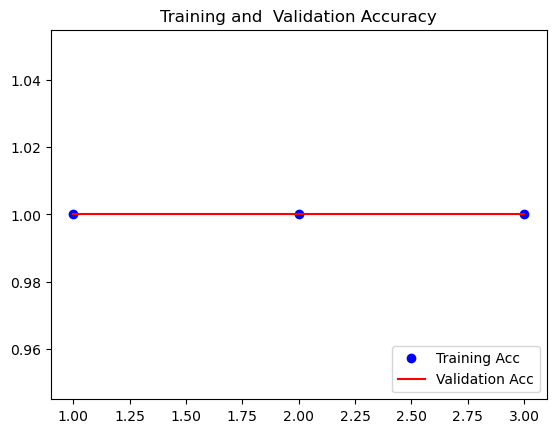

In [88]:
plt.plot(epochs, acc, 'bo', label = 'Training Acc')
plt.plot(epochs, val_acc, 'r', label = 'Validation Acc')
plt.title('Training and  Validation Accuracy')
plt.legend(loc = 4)
plt.show()

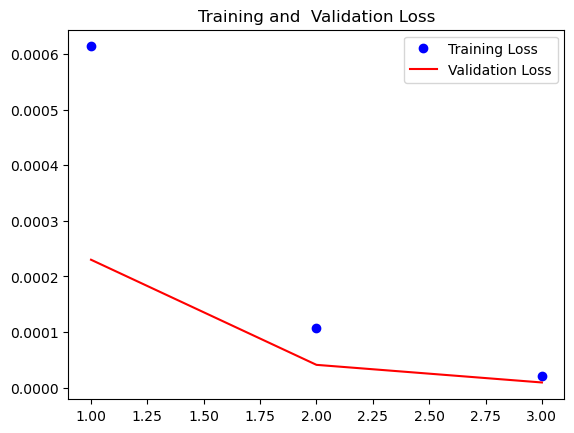

In [87]:
plt.plot(epochs, loss, 'bo', label = 'Training Loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation Loss')
plt.title('Training and  Validation Loss')
plt.legend(loc = 1)
plt.show()

In [91]:
from keras.models import load_model
# Best 모델 불러오기
loaded_model = load_model('./models/'+model_name)
# 토크나이저 불러오기
with open(tokenizer_name, 'rb') as handle:
    loaded_tokenizer = pickle.load(handle)

In [93]:
test_eval = loaded_model.evaluate(test_X_1hot, test_y)

50/50 [==============================] - 0s 3ms/step - loss: 2.3016e-04 - acc: 1.0000


In [96]:
def intToLabel(label_int):
    labels = ' '
    if label_int == 0:
        labels = '20,000원 이상 주문하시면 배송비가 없습니다'
    elif label_int == 1:
        labels = '담당자는 홈페이지에 직원의 이름 또는 사번을 넣으시면 자세한 정보를 알 수 있습니다.'
    elif label_int == 2:
        labels = '공급가와 소비자가는 홈페이지 > 직원 ID 로그인 > 물품명 > 가격조회 에서 확인 가능합니다.'
    elif label_int == 3:
        labels = '배송에는 보통 2일이 소요되며, 빠른 배송을 선택하시면 1일 안에 책임 배달합니다.'
    elif label_int == 4:
        labels = '매장 코드는 홈페이지 > 매장정보 에서 확인 가능합니다'
    elif label_int == 5:
        labels = '샘플신청은 홈페이지 > 직원 ID 로그인 > 물품명 > 샘플신청 에서 가능합니다'
    elif label_int == 6:
        labels = '다른 제품이 배송되어 죄송합니다. 홈페이지 > 물품명 > 환불신청 또는 전화 상담 부탁드립니다'
    elif label_int == 7:
        labels = '배송받으신 모든 제품은 7일 안에는 반품이 가능합니다. 홈페이지 > 물품명 > 환불신청 에서 반품 가능합니다'
    elif label_int == 8:
        labels = '배송받으신 모든 제품은 7일 안에는 교환이 가능합니다. 홈페이지 > 물품명 > 교환신청 에서 교환 가능합니다'
    elif label_int == 9:
        labels = '청구금액은 매달 12일 이후에 홈페이지 > 직원 ID 로그인 > 청구금액에서 확인 가능합니다'
    return labels

# 1문장 예측

In [101]:
is_true = True
while is_true:
    # 모든 과정을 재구성
    user_input = input('내용을 입력하세요 : ')
    # onlymorph_list를 써도 무방
    morphed_input, poses = rhinoMorph.wholeResult_list(rn, user_input,
                                                      pos = ['NNG','NNP','NP','VV','VA','XR','VCN','MAG','MAJ','IC'])
    text = [morphed_input]
    # 리스트를 한번 더 씌워 줌
    # Tokenizer가 중첩 리스트를 받아서 처리할 때 우리가 원하는 값을 얻을 수 있음

    text_sequencing = loaded_tokenizer.texts_to_sequences(text)
    text_padding = pad_sequences(text_sequencing, maxlen=maxlen)
    text_test = to_one_hot(text_padding, dimension= max_words)
    prediction = loaded_model.predict(text_test)
    print(np.round(prediction,2))
    label_int = np.argmax(prediction)
    label = intToLabel(label_int)
    print(label)
    keep = input('질문 더? : (Y/N)')
    if keep == 'Y':
        is_true = True
    elif keep == 'N':
        is_true = False
        print('감사합니다.')

내용을 입력하세요 : 이번 달 반품 마감일 확인 어디서 가능합니까?
1/1 [==============================] - 0s 17ms/step
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]
배송받으신 모든 제품은 7일 안에는 반품이 가능합니다. 홈페이지 > 물품명 > 환불신청 에서 반품 가능합니다
질문 더? : (Y/N)Y
내용을 입력하세요 : 얼마이상 주문해야 배송비 안 붙나요?
1/1 [==============================] - 0s 17ms/step
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
20,000원 이상 주문하시면 배송비가 없습니다
질문 더? : (Y/N)Y
내용을 입력하세요 : 제품을 교환하고 싶어요
1/1 [==============================] - 0s 17ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]
배송받으신 모든 제품은 7일 안에는 교환이 가능합니다. 홈페이지 > 물품명 > 교환신청 에서 교환 가능합니다
질문 더? : (Y/N)Y
내용을 입력하세요 : 매장 코드 번호 확인은 어떻게 해요?
1/1 [==============================] - 0s 19ms/step
[[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]
매장 코드는 홈페이지 > 매장정보 에서 확인 가능합니다
질문 더? : (Y/N)N
감사합니다.
